In [1]:
import numpy as np
from shared import *
from treeSearch import *
import seaborn as sns
from matplotlib import pyplot as plt
import itertools
sns.set_context('talk')

%load_ext autoreload
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# single stick sticking down

In [13]:
def run2taskL(taskL,nitr=50):
  ntasks = len(taskL)
  rt = np.zeros([nitr,4,ntasks])
  smode = np.zeros([nitr,4,ntasks])
  for itr in range(nitr):
    for idx,(mem,bfs) in enumerate(itertools.product([False,True],[True,False])):
      rt[itr,idx],smode[itr,idx] = treeSearch([t0,t1],BFS=bfs,memory=mem)
  return rt,smode
idxL = ['BFS','DFS','BFSm','DFSm']

### trivial training, onestep test

In [14]:
t0=Task(form_obs([9,12,13,16]),1,0)
t1=Task(form_obs([9,12,13,16,20]),1,1)
nitr = 100
rt,smode = run2taskL([t0,t1],nitr)

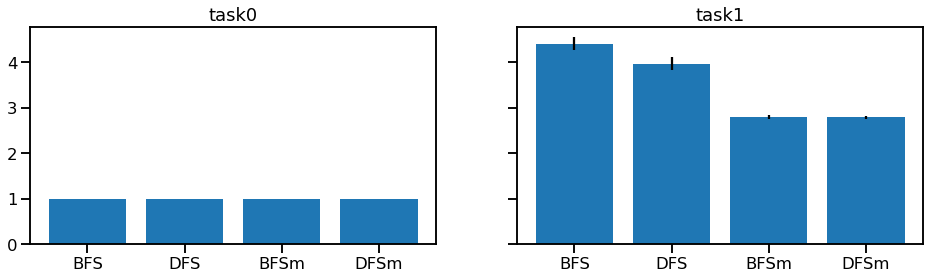

In [15]:
f,axar = plt.subplots(1,2,sharey=True,figsize=(16,4))
for ti in range(2):
  ax = axar[ti]
  ax.set_title('task%i'%ti)
  ax.bar(idxL,rt.mean(0)[:,ti],yerr=rt.std(0)[:,ti]/np.sqrt(nitr))

### 1step learn twostep

In [16]:
t0=Task(form_obs([9,12,13,16, 6]),1,1)
t1=Task(form_obs([9,12,13,16, 6,3]),1,2)
t2=Task(form_obs([9,12,13,16, 3,7]),1,2)

In [29]:
## transfer
rt1,smode = run2taskL([t0,t1],nitr=100)
rt1.mean(0)

array([[ 4.11, 17.38],
       [ 3.86, 11.73],
       [ 3.93,  5.36],
       [ 4.03, 12.15]])

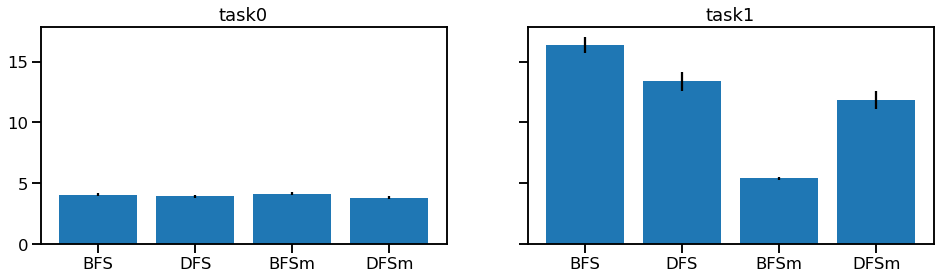

In [20]:
# fig
f,axar = plt.subplots(1,2,sharey=True,figsize=(16,4))
for ti in range(2):
  ax = axar[ti]
  ax.set_title('task%i'%ti)
  ax.bar(idxL,rt1.mean(0)[:,ti],yerr=rt1.std(0)[:,ti]/np.sqrt(nitr))

Text(0, 0.5, 'memory use')

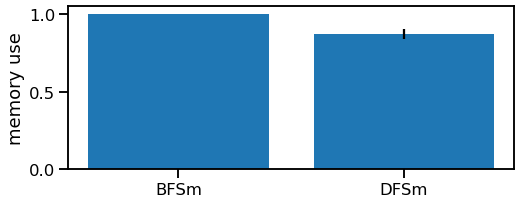

In [42]:
f,ax = plt.subplots(1,1,figsize=(8,3))
ax.bar(idxL[2:],smode.mean(0)[2:,1],yerr=smode.std(0)[2:,1]/np.sqrt(100))
ax.set_ylabel('memory use')

### expect no transfer

In [28]:
## no transfer
t0=Task(form_obs([9,12,13,16, 6]),1,1)
t2=Task(form_obs([9,12,13,16, 3,7]),1,2)
rt2,smode = run2taskL([t0,t2],nitr)
rt2.mean(0)

array([[ 3.92, 17.48],
       [ 4.25, 13.42],
       [ 4.1 ,  5.22],
       [ 3.85, 12.62]])

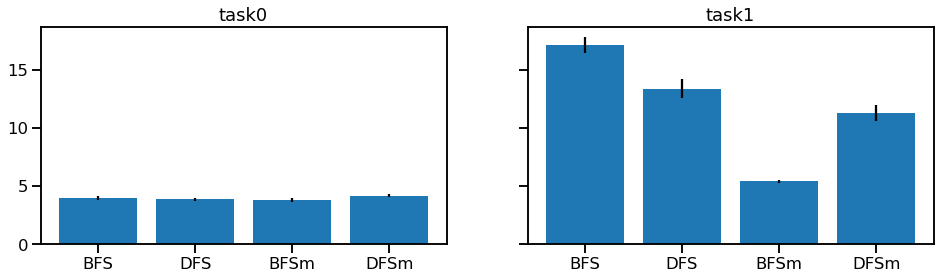

In [27]:
# fig
f,axar = plt.subplots(1,2,sharey=True,figsize=(16,4))
for ti in range(2):
  ax = axar[ti]
  ax.set_title('task%i'%ti)
  ax.bar(idxL,rt2.mean(0)[:,ti],yerr=rt2.std(0)[:,ti]/np.sqrt(nitr))

In [24]:
smode.mean(0)

array([[0. , 0. ],
       [0. , 0. ],
       [0. , 1. ],
       [0. , 0.8]])